# Market Basket Analysis with Apriori Algorithm

Some of us go to the grocery with a standard list; while some of us have a hard time sticking to our grocery shopping list, no matter how determined we are. No matter which type of person you are, retailers will always be experts at making various temptations to inflate your budget.
<br>
Huge retailers pivot on a detailed market basket analysis to uncover associations between items. Using this valuable information, they are able to carry out various strategies to improve their revenue:
<br>
<li>Associated products are placed close to each other, so that buyers of one item would be prompted to buy the other</li>
<li>Discounts can be applied to only one of the associated products</li>

## Dataset
### Context
This dataset has 38765 rows of the purchase orders of people from the grocery stores.
### Content
<li>Member_number: unique member number</li>
<li>Date: purchase date</li>
<li>itemDescription: grocery item</li>

## What is Apriori Algorithm ?

The Apriori Algorithm is one of the most popular algorithms used in association rule learning over relational databases. It identifies the items in a data set and further extends them to larger and larger item sets.
<br>
However, the Apriori Algorithm only extends if the item sets are frequent, that is the probability of the itemset is beyond a certain predetermined threshold.
<br>
The Apriori Algorithm proposes that:
<br>
The probability of an itemset is not frequent if:
<br>
<li>P(I) < Minimum support threshold, where I is any non-empty itemset</li>
<li>Any subset within the itemset has value less than minimum support</li>
The second characteristic is defined as the Anti-monotone Property. A good example would be if the probability of purchasing a burger is below the minimum support already, the probability of purchasing a burger and fries will definitely be below the minimum support as well.
<b>Steps in the Apriori Algorithm</b>
<br>
The diagram below illustrates how the Apriori Algorithm starts building from the smallest itemset and further extends forward.
<br>
<li>The algorithm starts by generating an itemset through the Join Step, that is to generate (K+1) itemset from K-itemsets. For example, the algorithm generates Cookie, Chocolate and Cake in the first iteration</li>
<li>Immediately after that, the algorithm proceeds with the Prune Step, that is to remove any candidate item set that does not meet the minimum support requirement. For example, the algorithm will remove Cake if Support(Cake) is below the predetermined minimum Support</li>
It iterates both of the steps until there are no possible further extensions left.

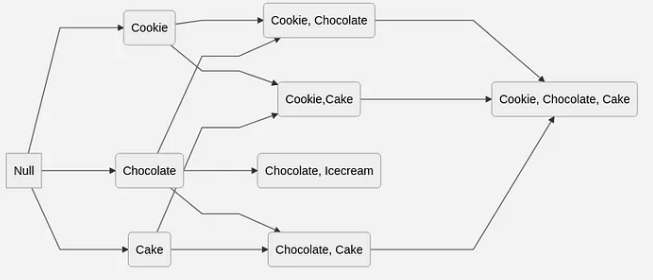

# Libraries

Please install the following dependencies using pip install:
<li>mlxtend</li>
<li>networkx</li>
<li>regex</li>
<li>seaborn</li>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# ML Data Engineering

In [12]:
# Please download the dataset from https://www.kaggle.com/datasets/balajikartheek/groceries-dataset
basket = pd.read_csv("Groceries_dataset.csv")
basket.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Grouping into transactions
<li>The data set records individual item purchases in a row. We will have to group these purchases into baskets of items</li>
<li>After that, we will use TransactionEncoder to encode the transactions into a format that is suitable for the Apriori function</li>

In [13]:
basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
basket = basket.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## ML Model Engineering

The Apriori Algorithm will be used to generate frequent item sets. We will be specifying the minimum support to be 6 out of total transactions. The association rules are generated and we filter for Lift value > 1.5.

In [14]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854,0.383247
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289,0.381761
2,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922,0.427761
3,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685,0.426767
4,(soda),(artif. sweetener),0.097106,0.001938,0.000468,0.004818,2.485725,0.000280,1.002893,0.661986


Rules identified:  190


## ML Model Evaluation

To visualize our association rules, we can plot them in a 3D scatter plot. Rules that are closer to top right are the rules that can be the most meaningful to be further dived in.

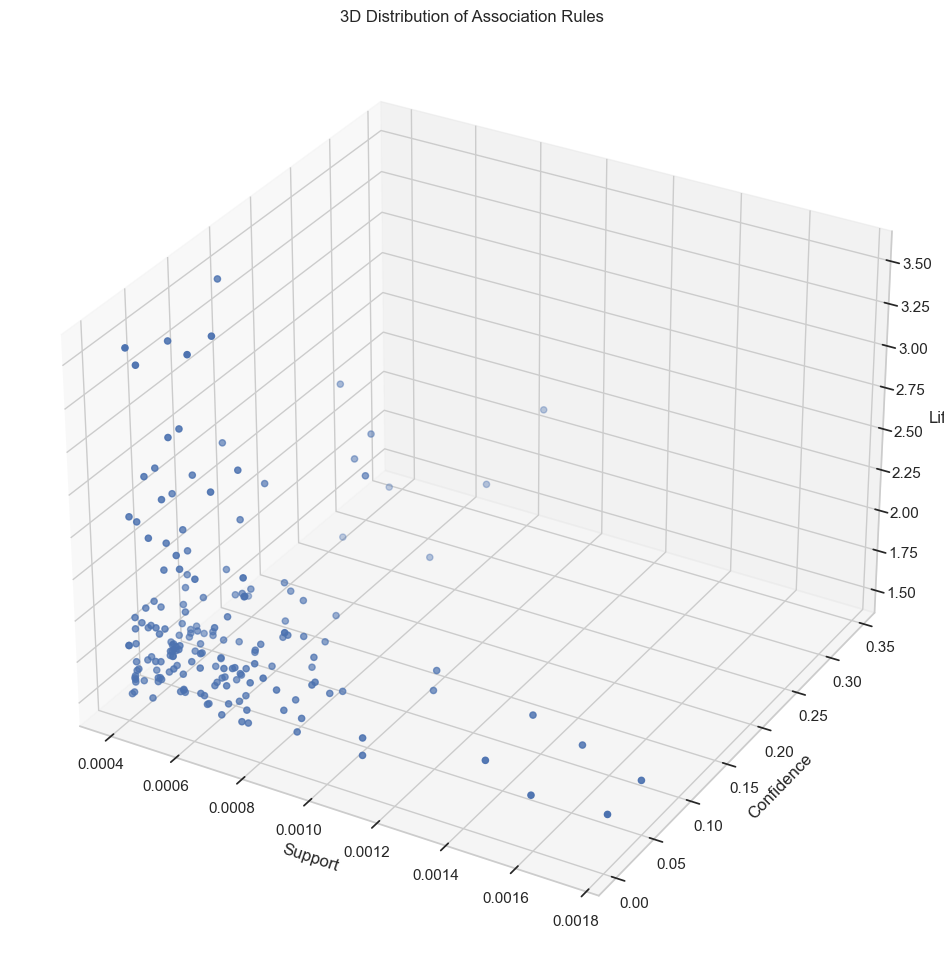

In [15]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

Another type of visualizations to look at the relationship between the products is via Network Graph. Let’s define a function to draw a network graph which can specify how many rules we want to show.

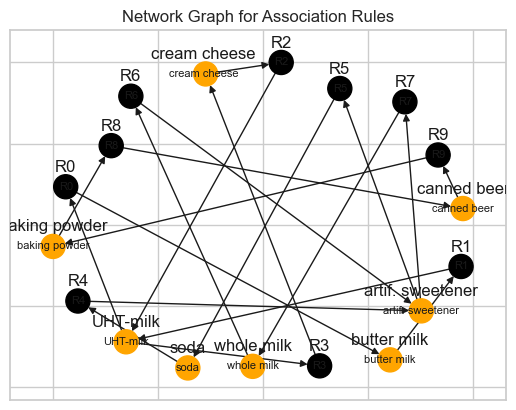

In [16]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  
  # Draw the network graph
  nx.draw_networkx(network, pos, node_color = color_map, font_size=8)
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

## Business Application
Let’s say the grocery has bought up too much Whole Milk and is now worrying that the stocks will expire if they cannot be sold out in time. To make matters worse, the profit margin of Whole Milk is so low that they cannot afford to have a promotional discount without killing too much of their profits.
<br>
One approach that can be proposed is to find out which products drive the sales of Whole Milk and offer discounts on those products instead.

In [17]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,0.461695
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,0.428360


For instance, we can apply a promotional discount on Brandy, Softener, Canned Fruit, Syrup and Artificial Sweetener. Some of the associations may seem counter-intuitive, but the rules state that these products do drive the sales of Whole Milk.

## Takeaway
By implementing the Apriori Algorithm and analyzing the association measures, businesses can derive dozens of data-driven strategies to boost their revenue and profits. These association rules are critical in data mining for analyzing consumer’s purchasing behavior. Some of the most important strategies of a retailer, such as Customer analytics, Market Basket analysis and Product Clustering are able to derive valuable insights through association rule mining.

## References

https://chat.openai.com/<br>
https://www.kaggle.com/datasets/balajikartheek/groceries-dataset<br>
https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c